In [1]:
from gensim.models import Word2Vec
import os
from gensim.models import Word2Vec
import glob, csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from itertools import combinations
from itertools import product
import numpy as np

romance_model = Word2Vec.load("./word2vec_models/romance_model/romance_model")
comics_model = Word2Vec.load("./word2vec_models/comics_model/comics_model")
children_model = Word2Vec.load("./word2vec_models/children_model/children_model")
poetry_model = Word2Vec.load("./word2vec_models/poetry_model/poetry_model")
mystery_model = Word2Vec.load("./word2vec_models/mystery_model/mystery_model")

def cosine_similarity(pair, vectors):

    '''
    Word2Vec.wv.similarity(word1,word2)
    '''
    word1, word2 = pair
    if word1 and word2 in vectors:
        sim = vectors.similarity(word1,word2)
        return sim
    else: 
        return 0

def generate_heatmap_matrix(lexicon, gender_words, model):
    vectors = model.wv
    
    # Generate all possible pairs of words from lexicon and gender_words
    pairs = list(itertools.product(lexicon, gender_words))
    
    # Calculate similarity scores for each pair of words
    sim_scores = [cosine_similarity(pair, vectors) for pair in pairs]
    
    # Create a square DataFrame with similarity scores
    df_hm = pd.DataFrame(0, index=lexicon, columns=gender_words)
    for pair, score in zip(pairs, sim_scores):
        df_hm.loc[pair[0], pair[1]] = score
    
    return df_hm

def plot_heatmap(lexicon, gender_words, model, title, color):
    df_hm = generate_heatmap_matrix(lexicon, gender_words, model)

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_hm,
                cmap=color,
                xticklabels=True,
                yticklabels=True,
                annot=True,  
                fmt=".2f",  
                linewidths=.5)  
    plt.xlabel('Gender Words')
    plt.ylabel('Lexicon Words')
    plt.title(title)
    plt.show()

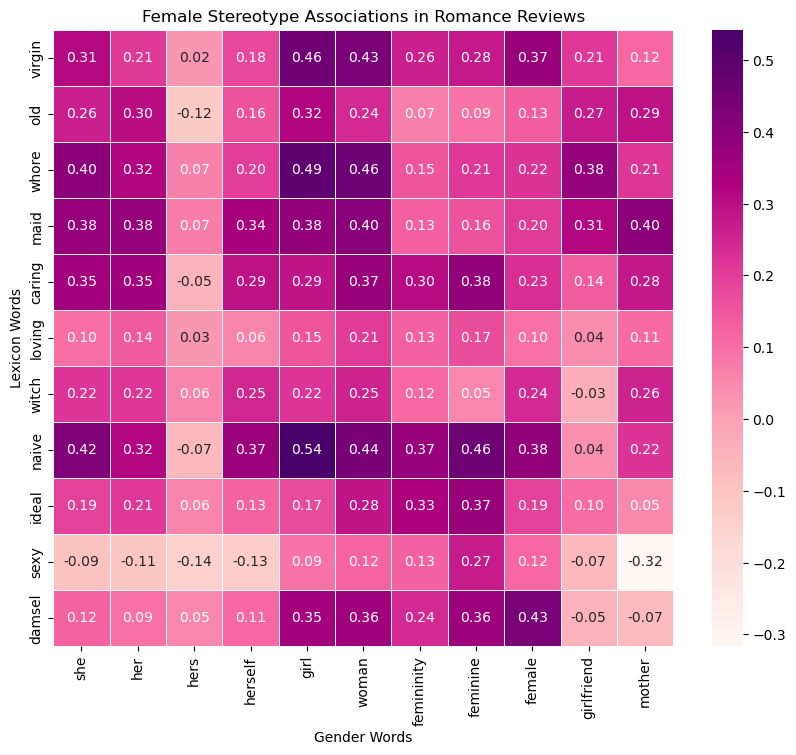

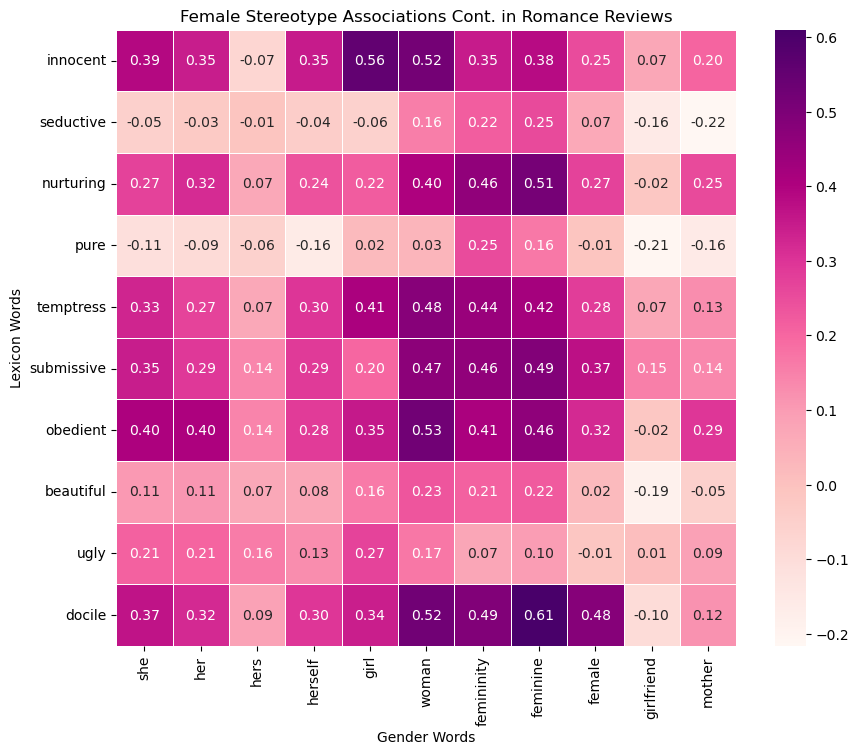

In [2]:
female_stereotypes_1 = ["virgin", "old", "whore", "maid", "caring", "loving", 
                     "witch", "naive", "ideal", "sexy", "damsel"]

female_stereotypes_2 = ["innocent", "seductive", "nurturing", "pure", "temptress", "submissive", 
                        "obedient", "beautiful","ugly","docile"]

women_words = ["she", "her", "hers", "herself", "girl", "woman", "femininity", "feminine",
                "female", "girlfriend", "mother"]

men_words = ["he", "him", "his", "himself", "boy", "man", "masculinity", "masculine",
            "male", "boyfriend", "father"]

male_stereotypes_1 = ["strong", "warrior", "soldier", "dominant", "sexy", "heroic", "hero",
                     "power", "intelligent", "smart", "rich"]
male_stereotypes_2 = ["logical", "rational", "fearless", "assertive", "brave", "protector", "tough", 
                     "muscular", "honorable", "charismatic", "daring"]


plot_heatmap(female_stereotypes_1, women_words, romance_model, "Female Stereotype Associations in Romance Reviews", "RdPu")
plot_heatmap(female_stereotypes_2, women_words, romance_model, "Female Stereotype Associations Cont. in Romance Reviews", "RdPu")


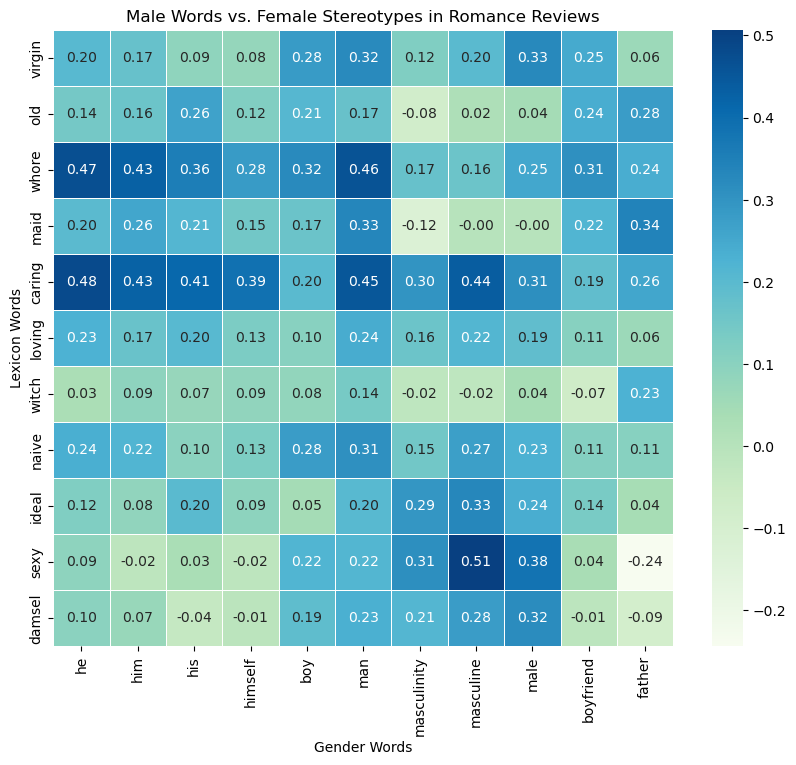

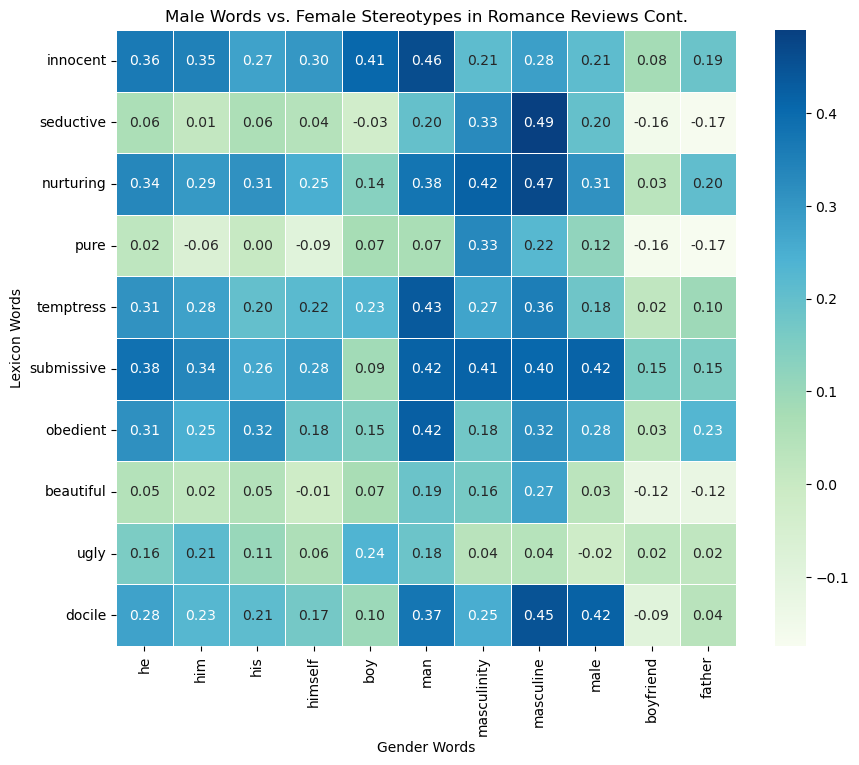

In [3]:
plot_heatmap(female_stereotypes_1, men_words, romance_model, "Male Words vs. Female Stereotypes in Romance Reviews", "GnBu")
plot_heatmap(female_stereotypes_2, men_words, romance_model, "Male Words vs. Female Stereotypes in Romance Reviews Cont.", "GnBu")

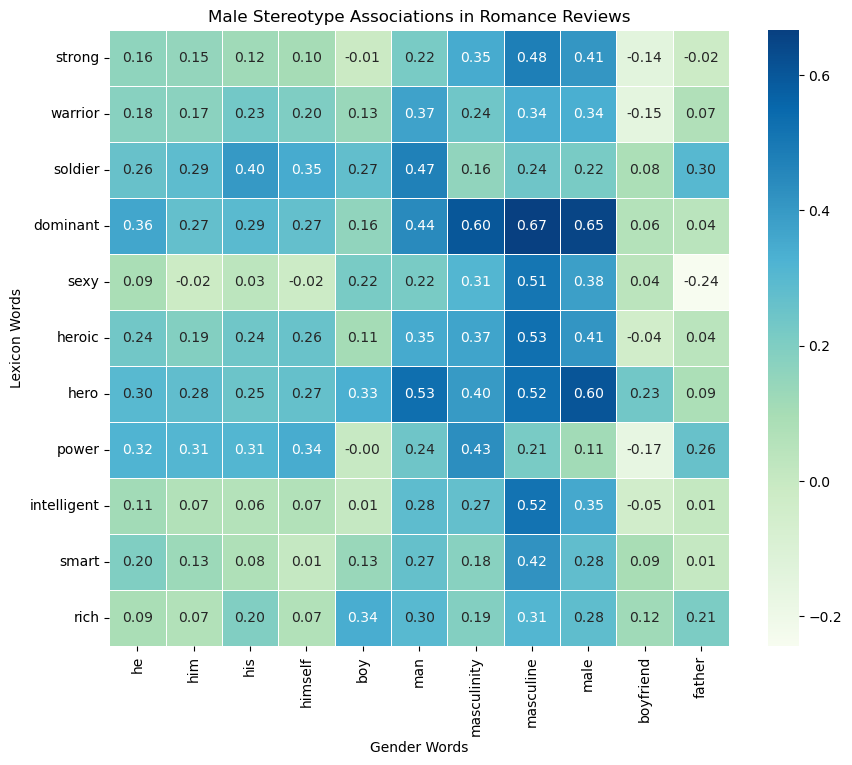

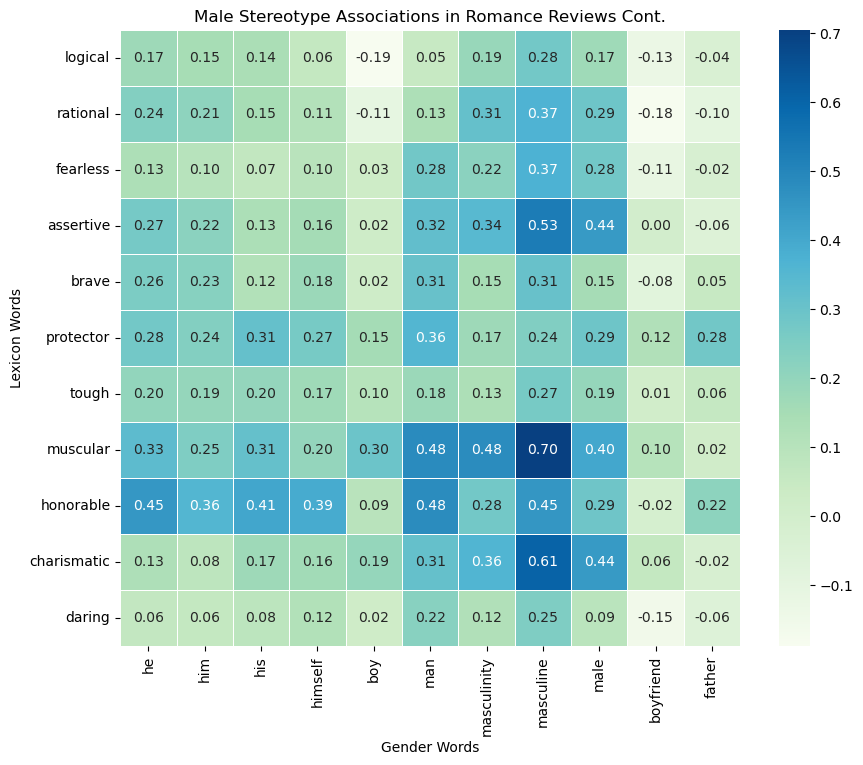

In [4]:
plot_heatmap(male_stereotypes_1, men_words, romance_model, "Male Stereotype Associations in Romance Reviews", "GnBu")
plot_heatmap(male_stereotypes_2, men_words, romance_model, "Male Stereotype Associations in Romance Reviews Cont.", "GnBu")


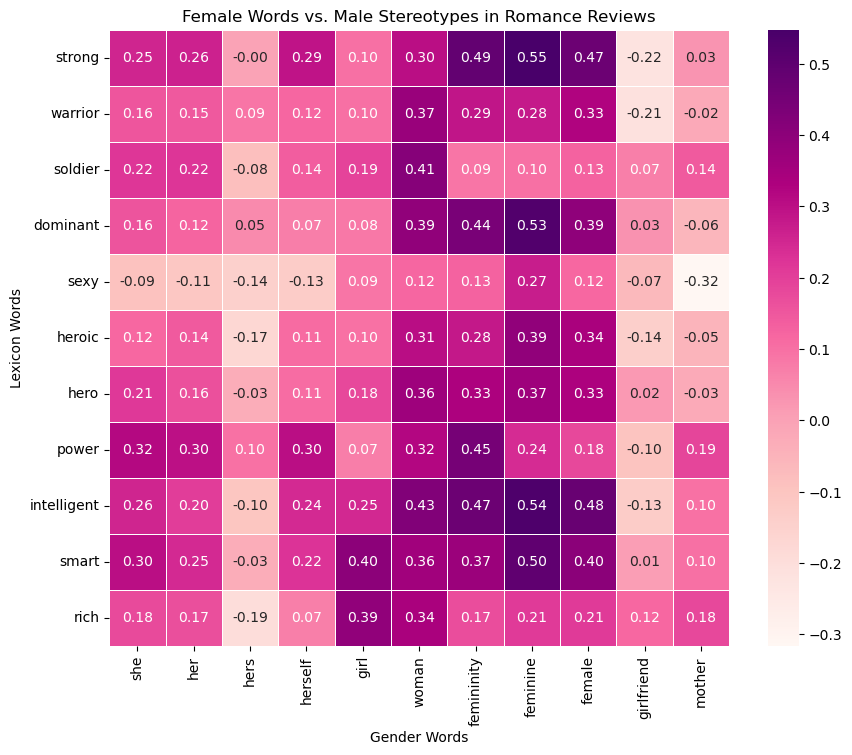

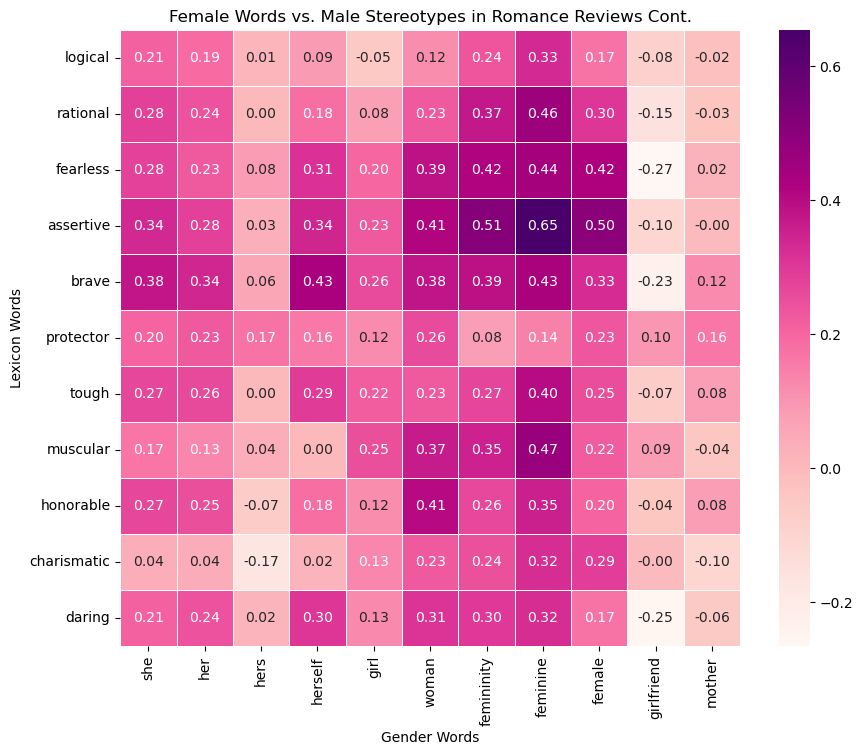

In [5]:
plot_heatmap(male_stereotypes_1, women_words, romance_model, "Female Words vs. Male Stereotypes in Romance Reviews", "RdPu")
plot_heatmap(male_stereotypes_2, women_words, romance_model, "Female Words vs. Male Stereotypes in Romance Reviews Cont.", "RdPu")

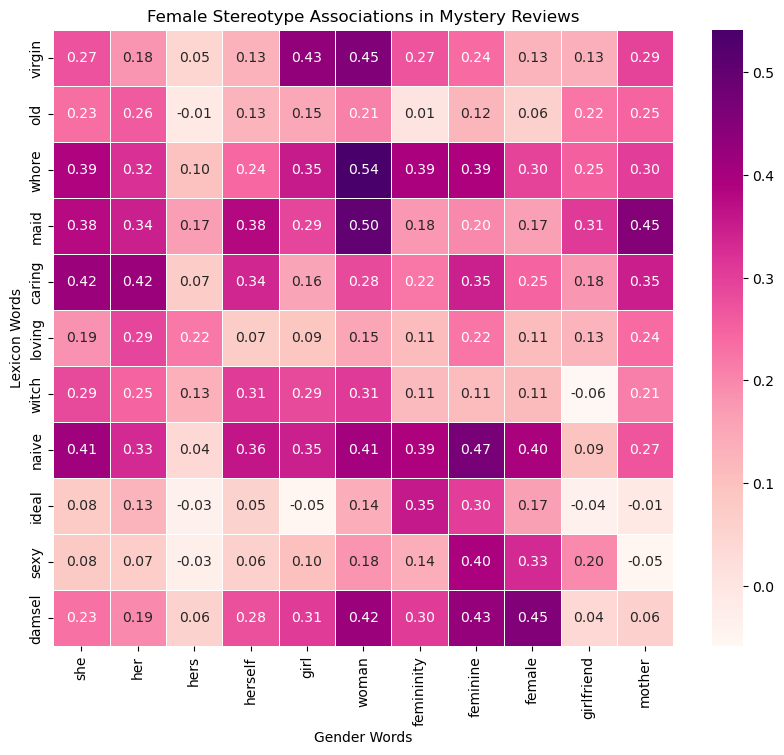

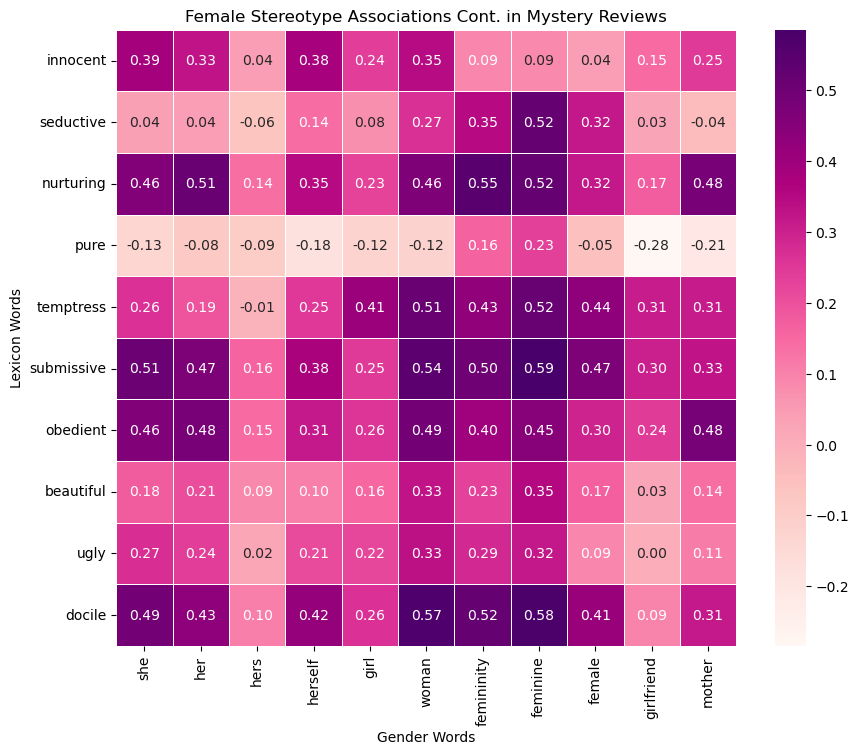

In [6]:
plot_heatmap(female_stereotypes_1, women_words, mystery_model, "Female Stereotype Associations in Mystery Reviews", "RdPu")
plot_heatmap(female_stereotypes_2, women_words, mystery_model, "Female Stereotype Associations Cont. in Mystery Reviews", "RdPu")


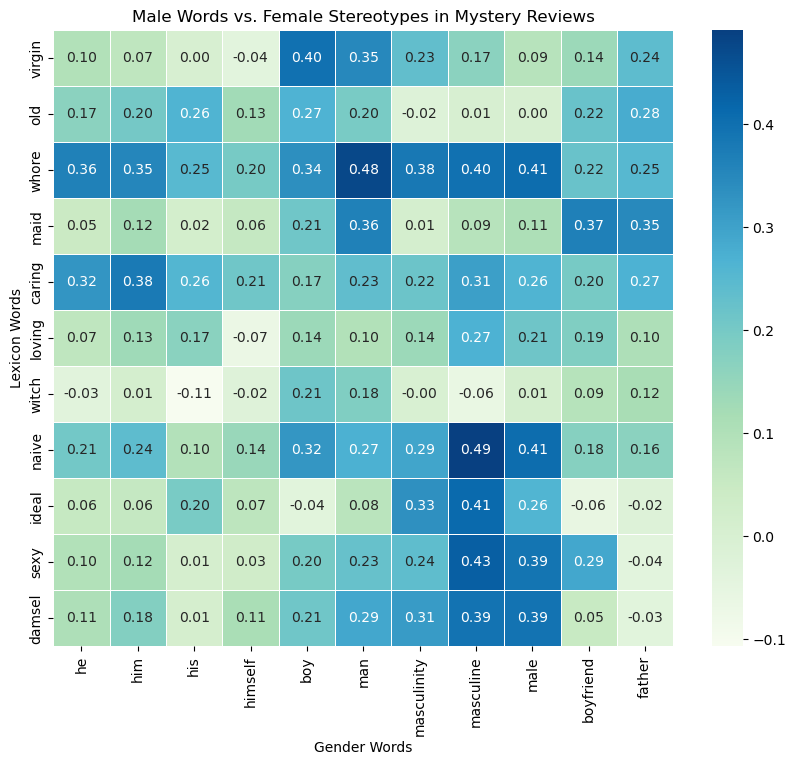

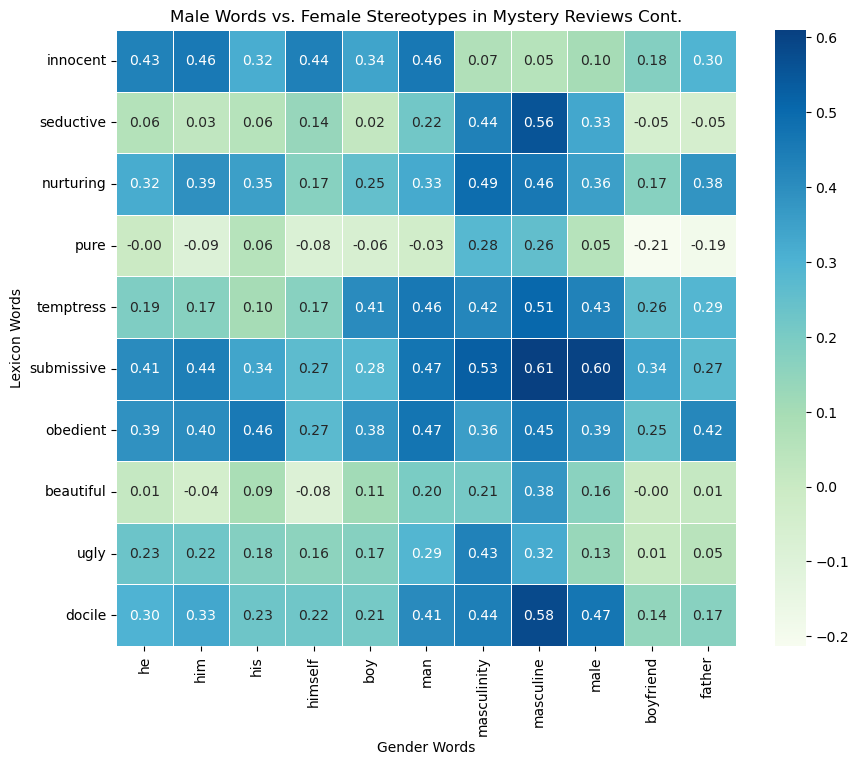

In [7]:
plot_heatmap(female_stereotypes_1, men_words, mystery_model, "Male Words vs. Female Stereotypes in Mystery Reviews", "GnBu")
plot_heatmap(female_stereotypes_2, men_words, mystery_model, "Male Words vs. Female Stereotypes in Mystery Reviews Cont.", "GnBu")

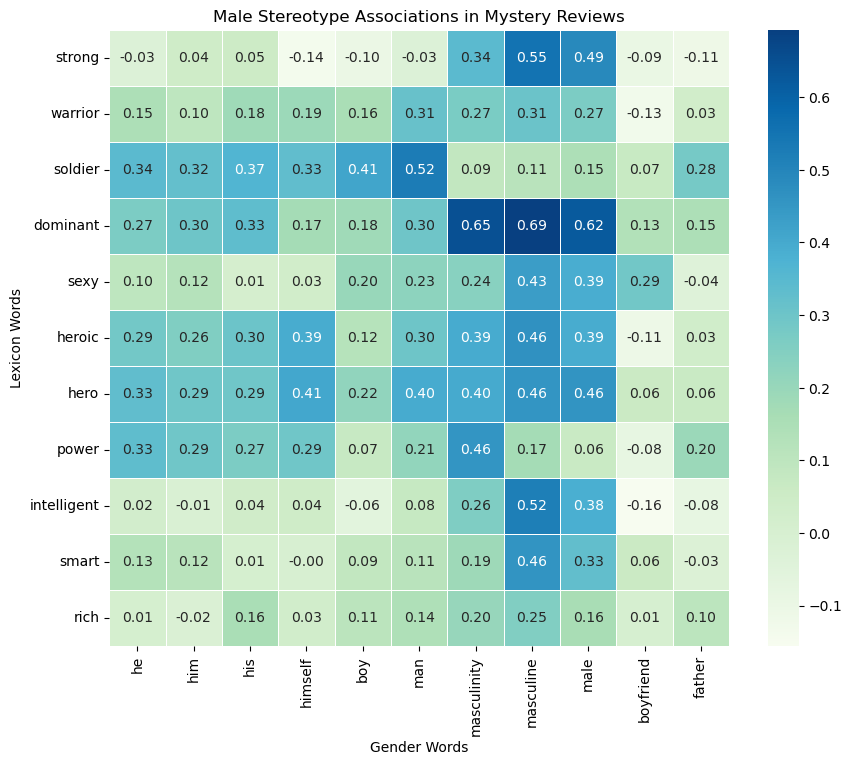

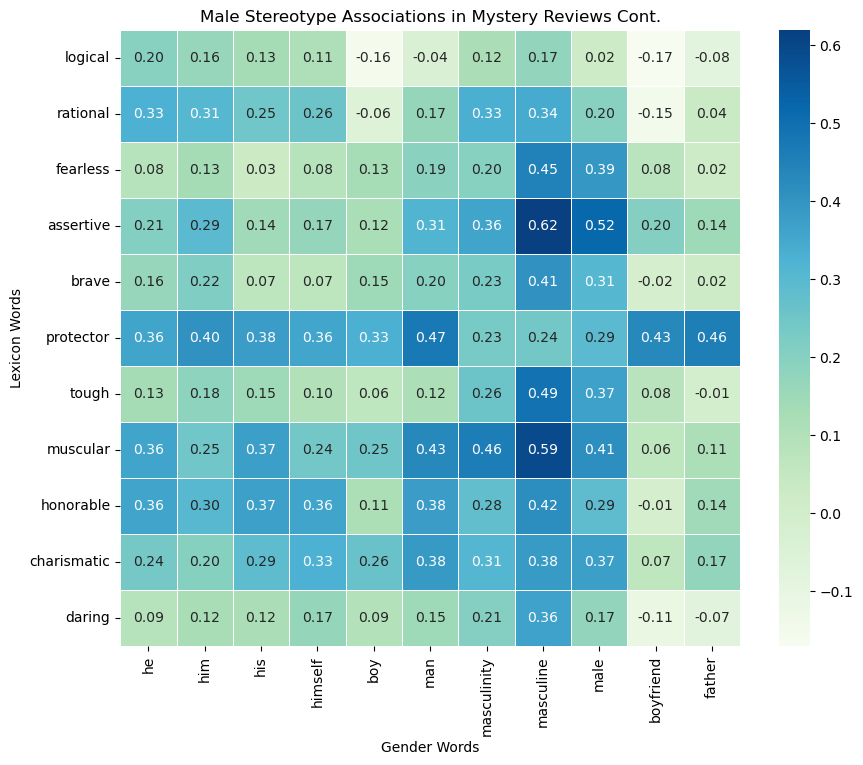

In [8]:
plot_heatmap(male_stereotypes_1, men_words, mystery_model, "Male Stereotype Associations in Mystery Reviews", "GnBu")
plot_heatmap(male_stereotypes_2, men_words, mystery_model, "Male Stereotype Associations in Mystery Reviews Cont.", "GnBu")

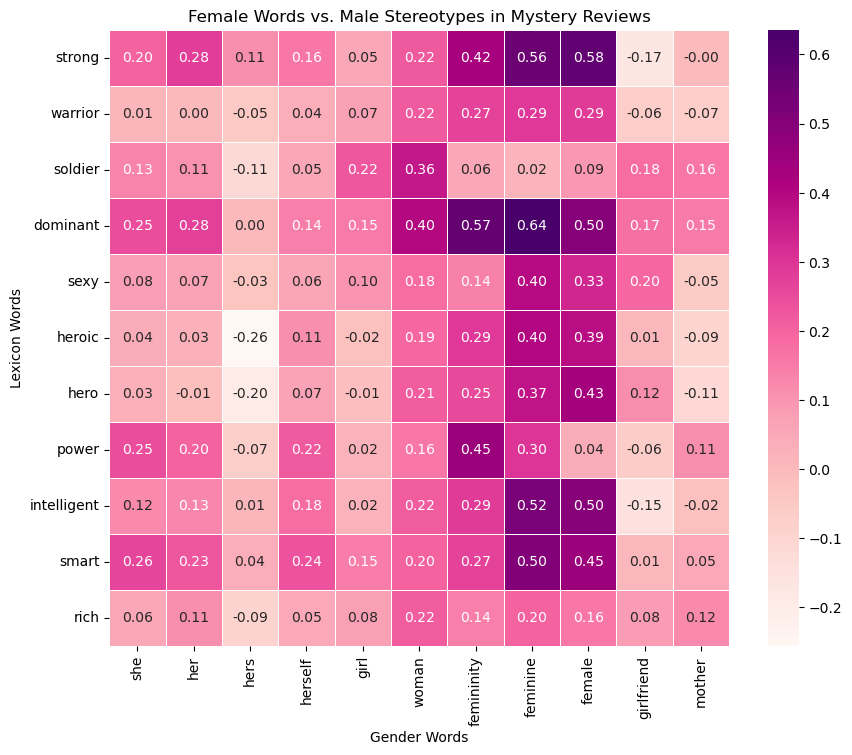

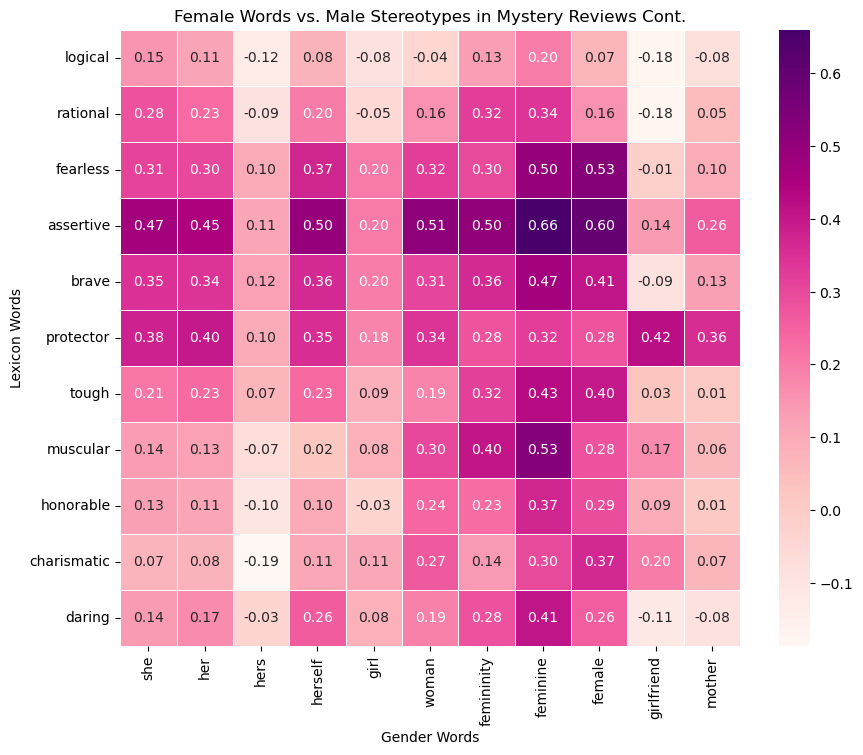

In [9]:
plot_heatmap(male_stereotypes_1, women_words, mystery_model, "Female Words vs. Male Stereotypes in Mystery Reviews", "RdPu")
plot_heatmap(male_stereotypes_2, women_words, mystery_model, "Female Words vs. Male Stereotypes in Mystery Reviews Cont.", "RdPu")

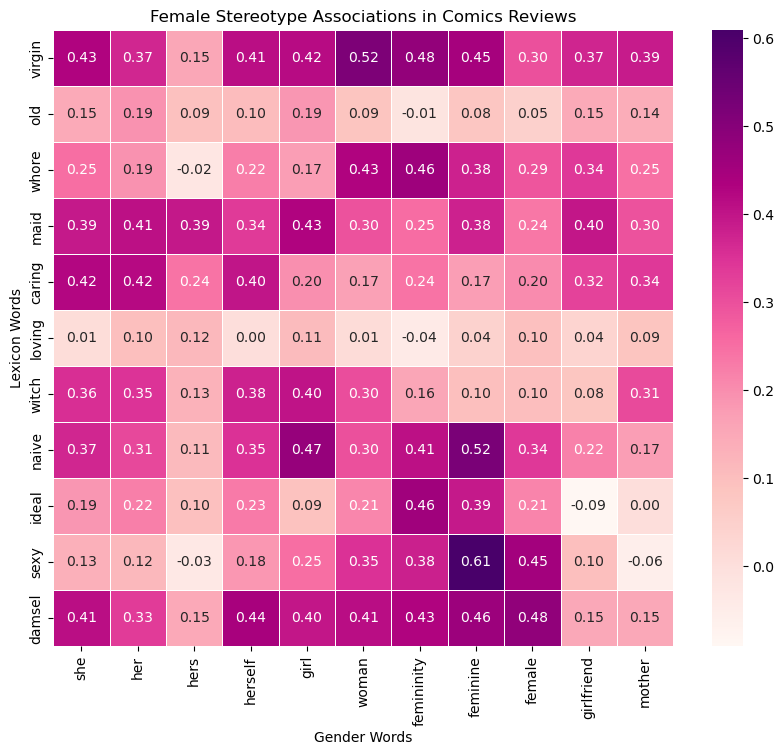

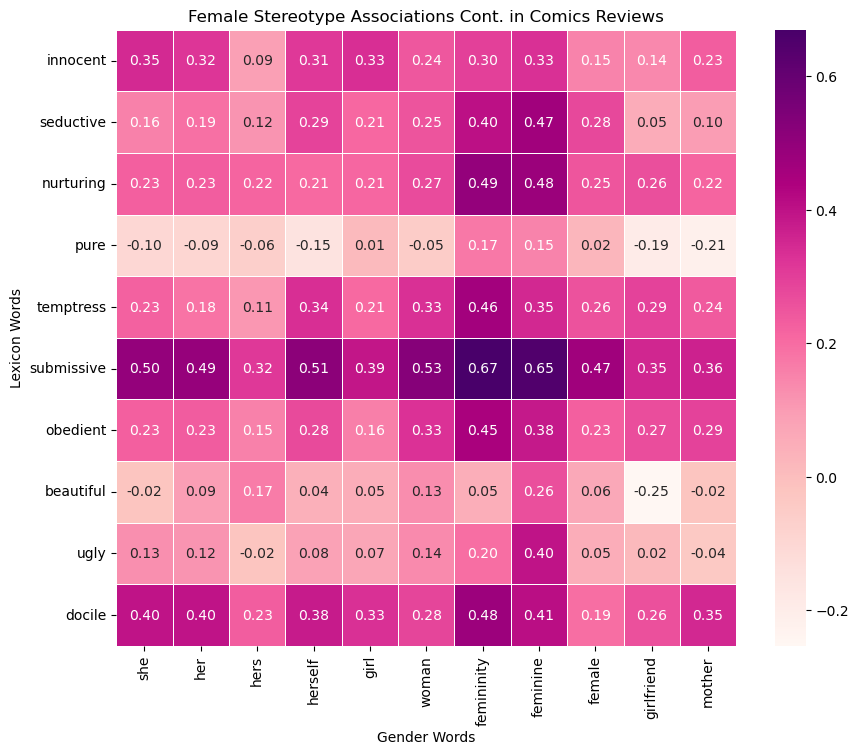

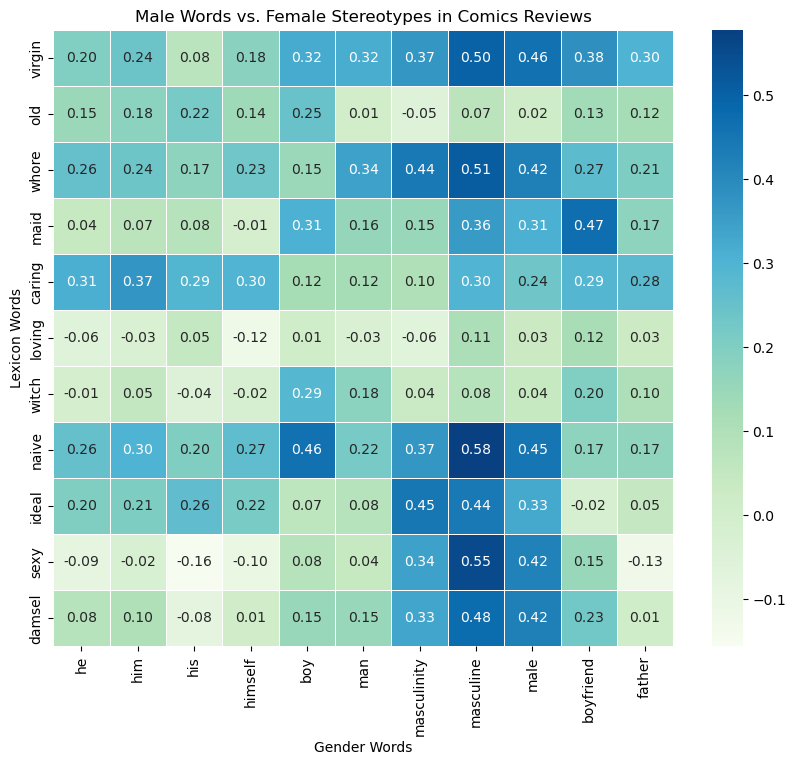

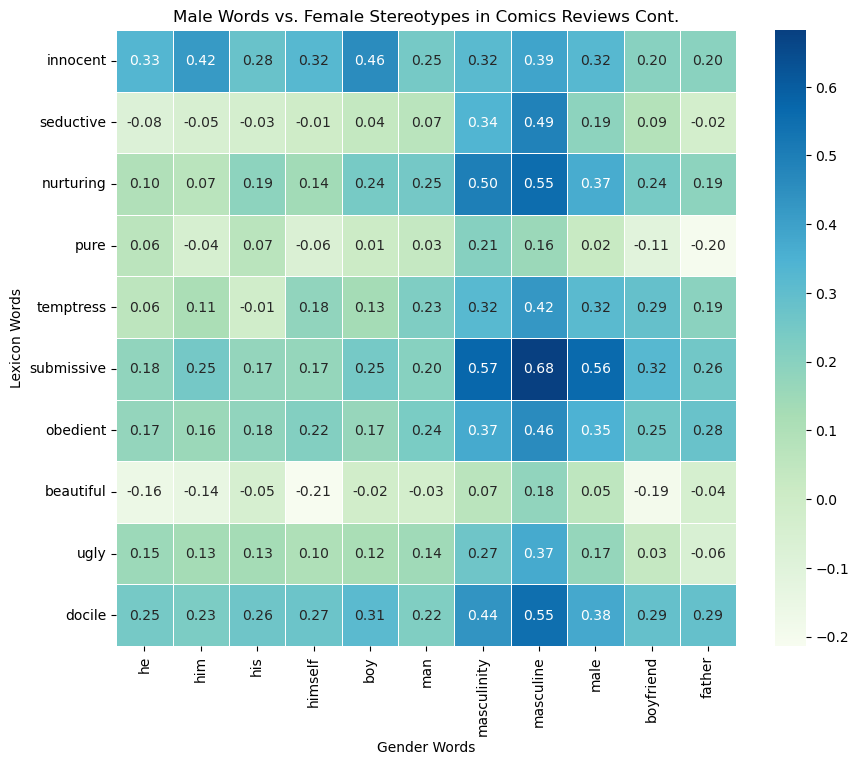

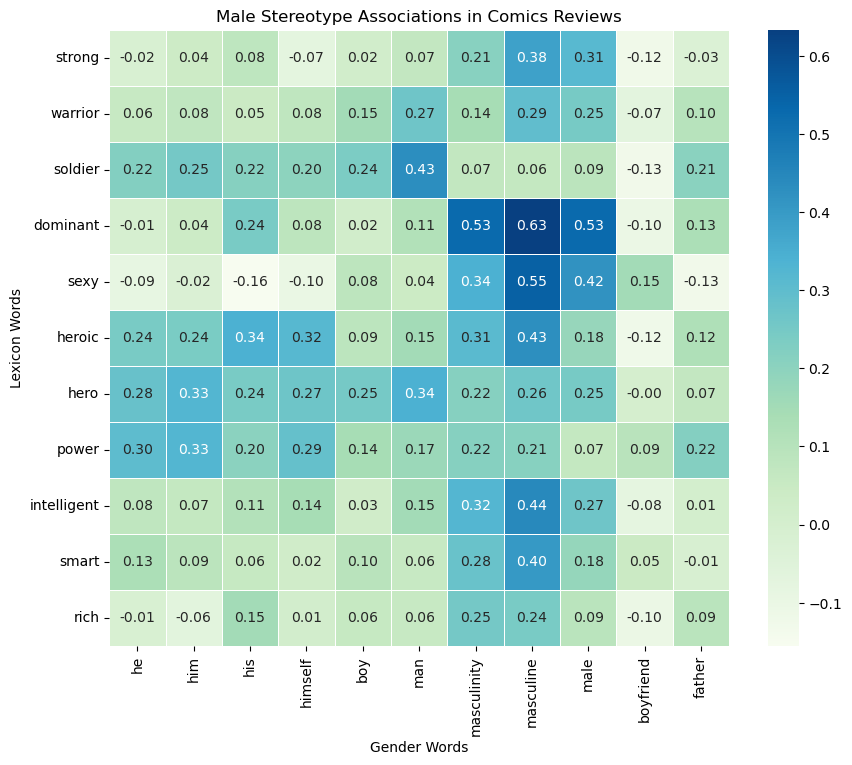

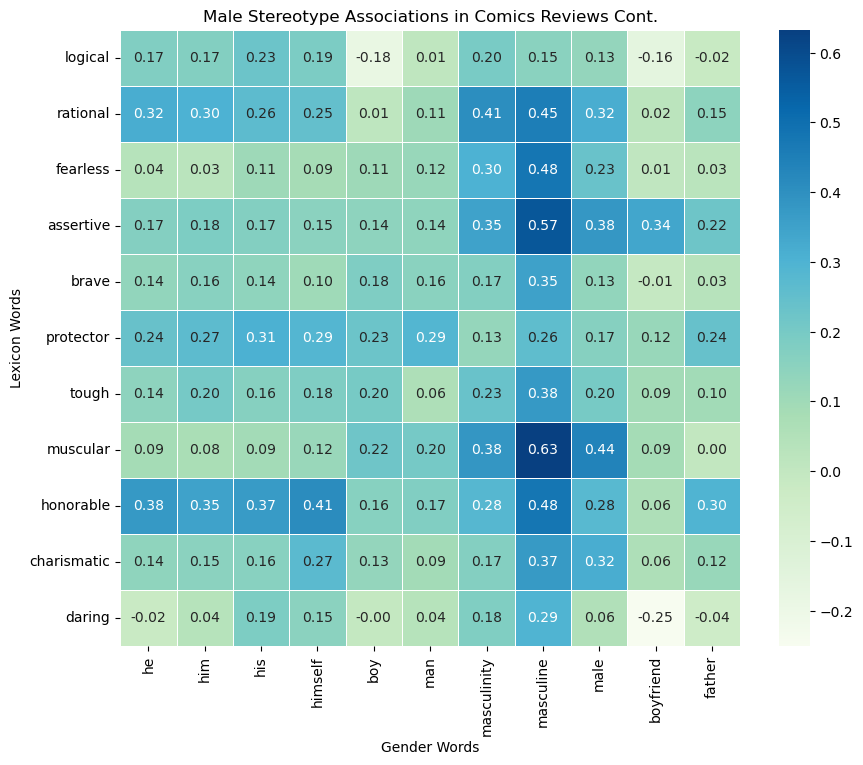

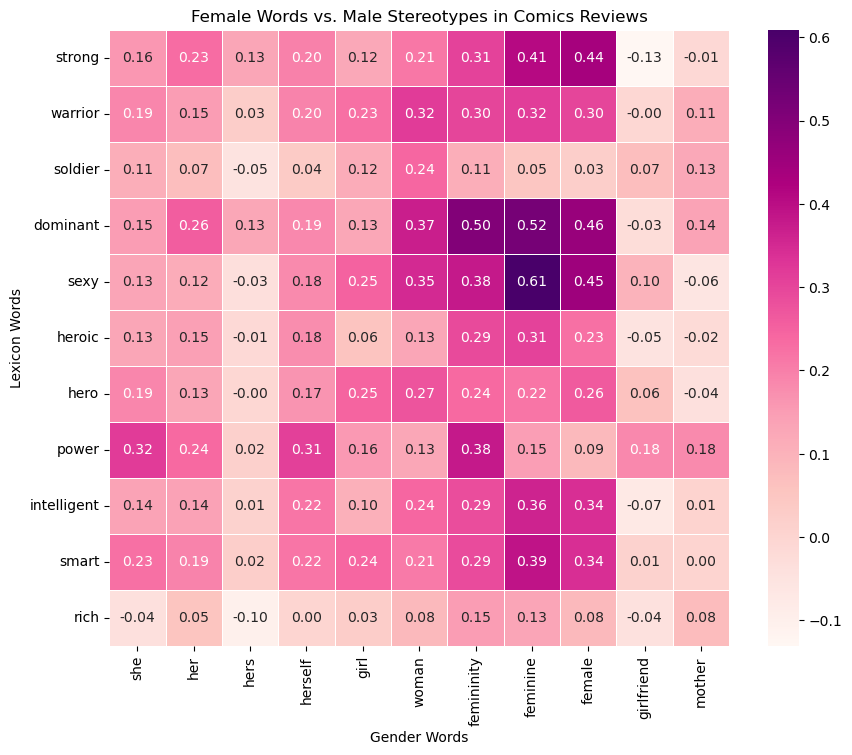

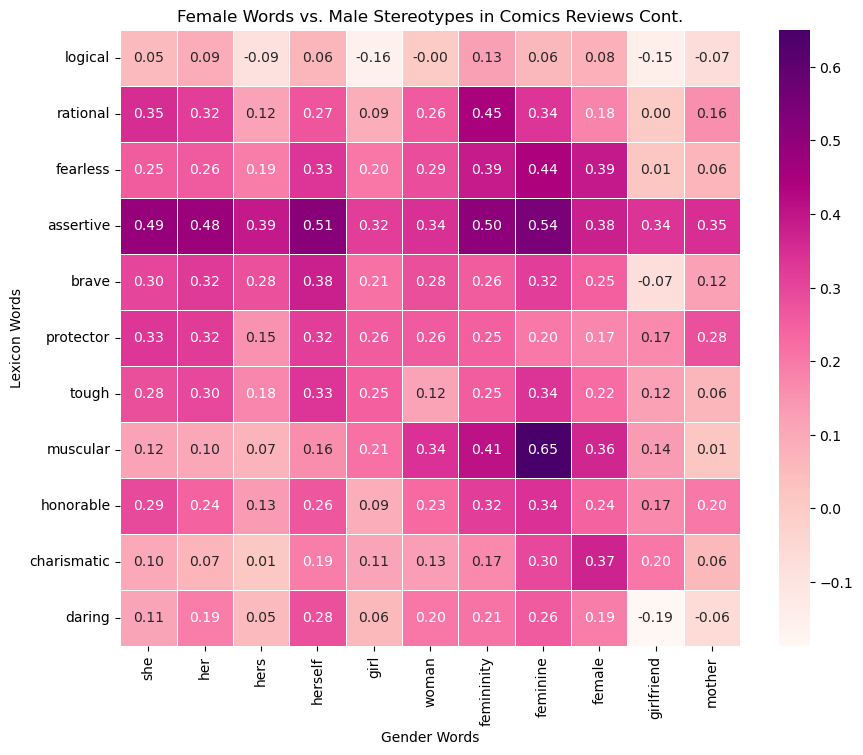

In [10]:
plot_heatmap(female_stereotypes_1, women_words, comics_model, "Female Stereotype Associations in Comics Reviews", "RdPu")
plot_heatmap(female_stereotypes_2, women_words, comics_model, "Female Stereotype Associations Cont. in Comics Reviews", "RdPu")
plot_heatmap(female_stereotypes_1, men_words, comics_model, "Male Words vs. Female Stereotypes in Comics Reviews", "GnBu")
plot_heatmap(female_stereotypes_2, men_words, comics_model, "Male Words vs. Female Stereotypes in Comics Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, men_words, comics_model, "Male Stereotype Associations in Comics Reviews", "GnBu")
plot_heatmap(male_stereotypes_2, men_words, comics_model, "Male Stereotype Associations in Comics Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, women_words, comics_model, "Female Words vs. Male Stereotypes in Comics Reviews", "RdPu")
plot_heatmap(male_stereotypes_2, women_words, comics_model, "Female Words vs. Male Stereotypes in Comics Reviews Cont.", "RdPu")

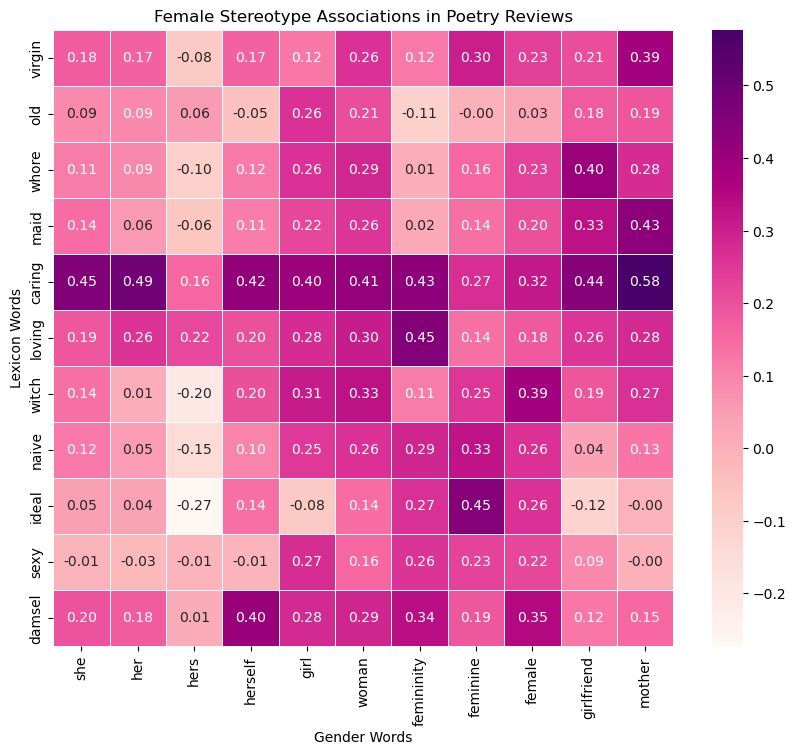

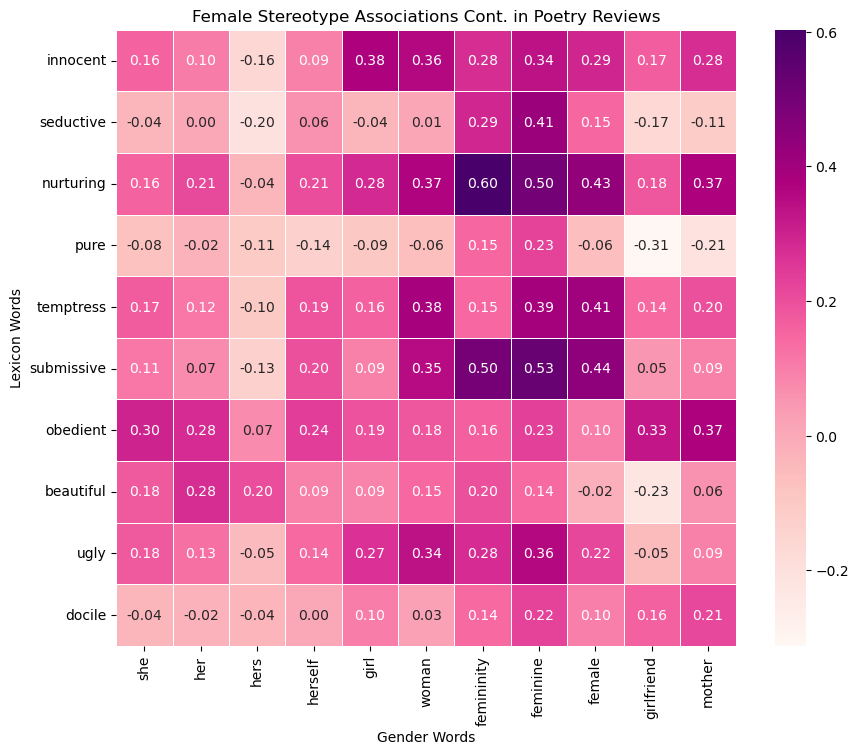

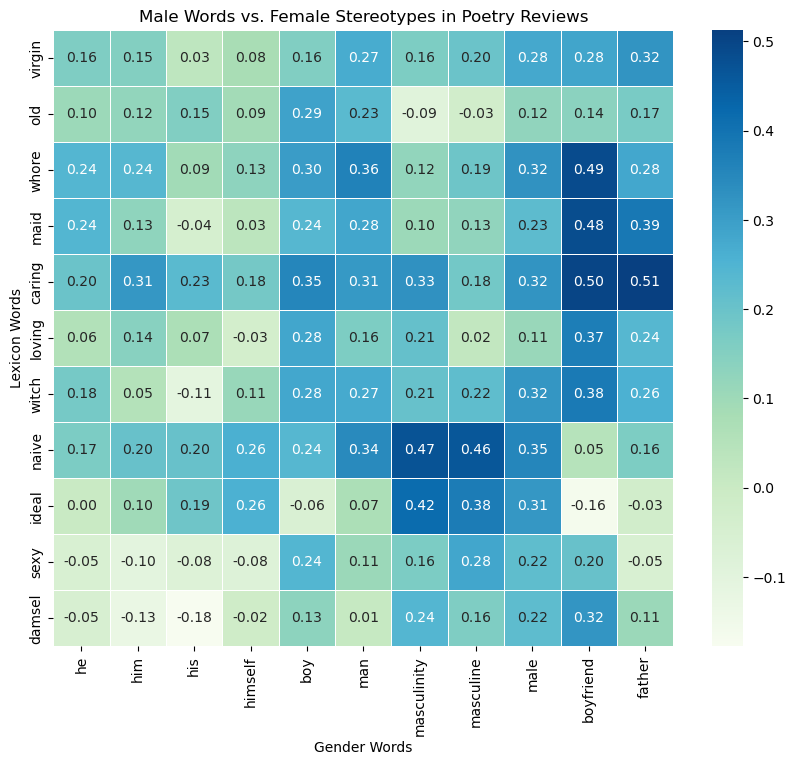

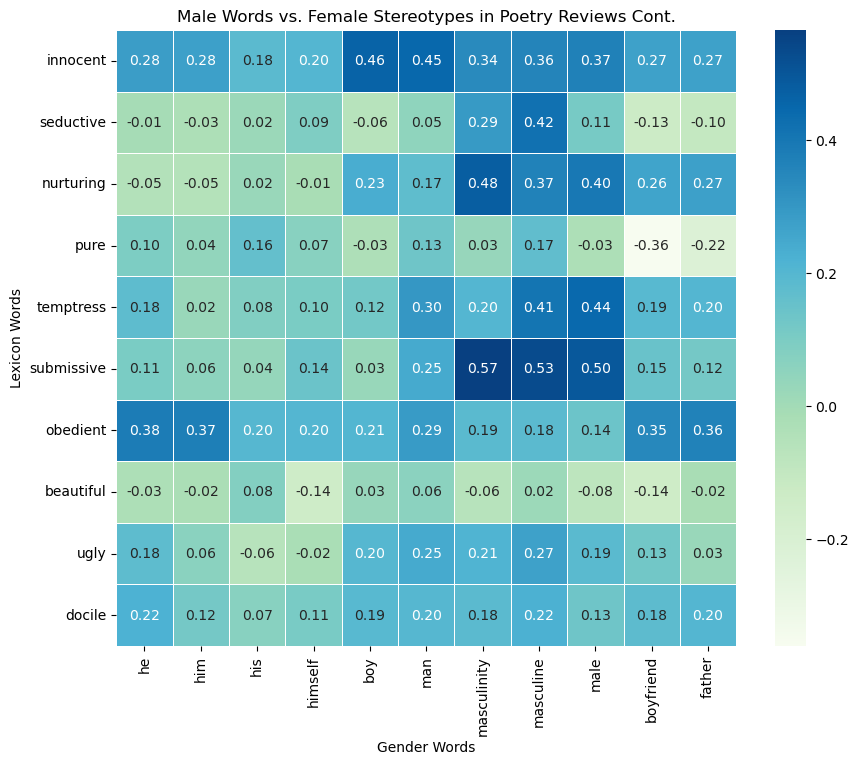

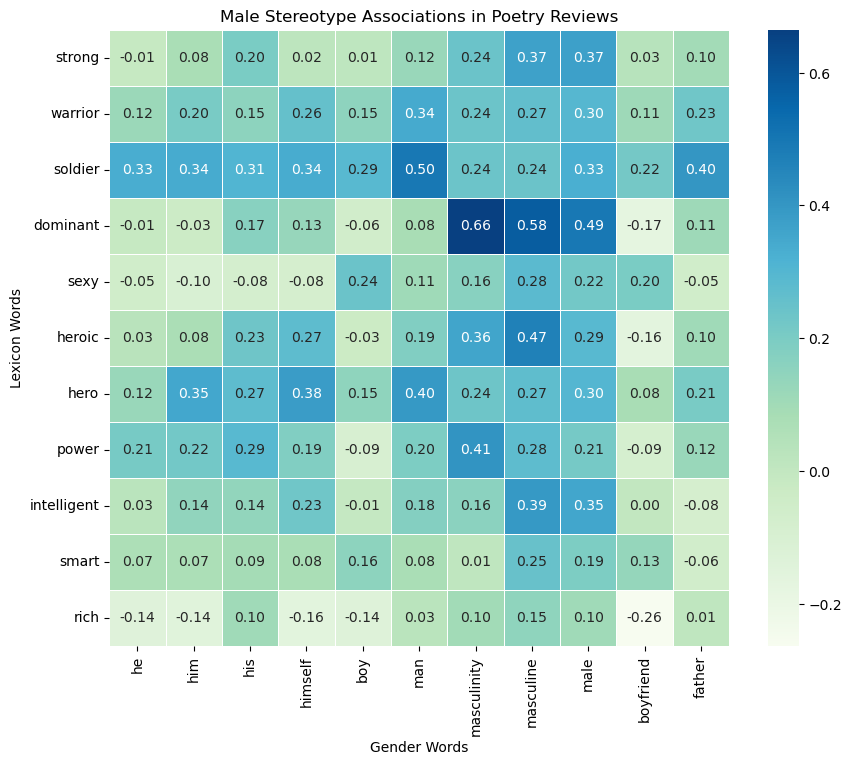

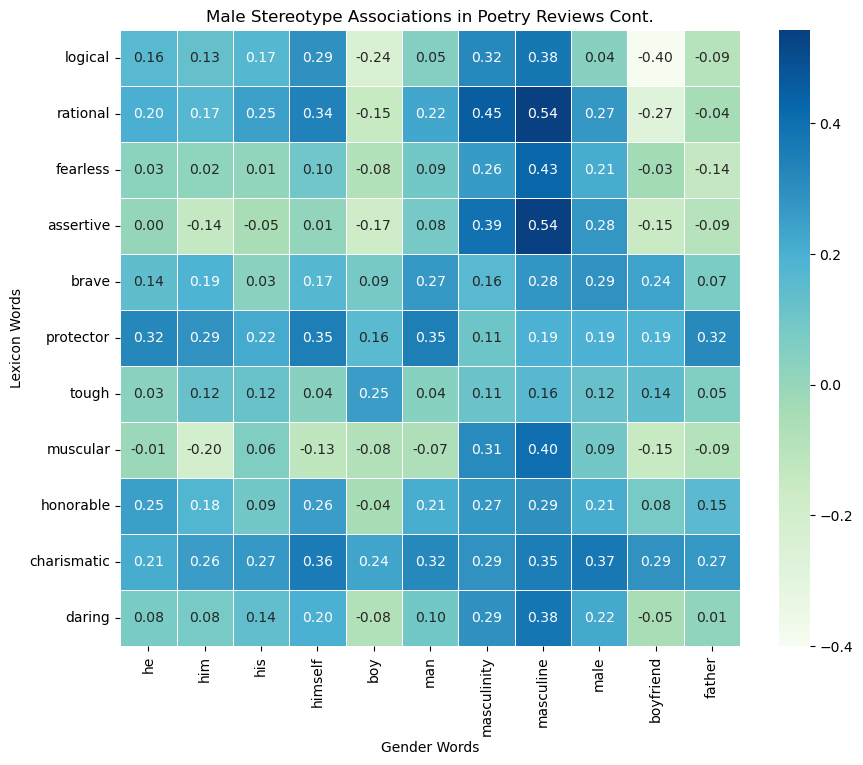

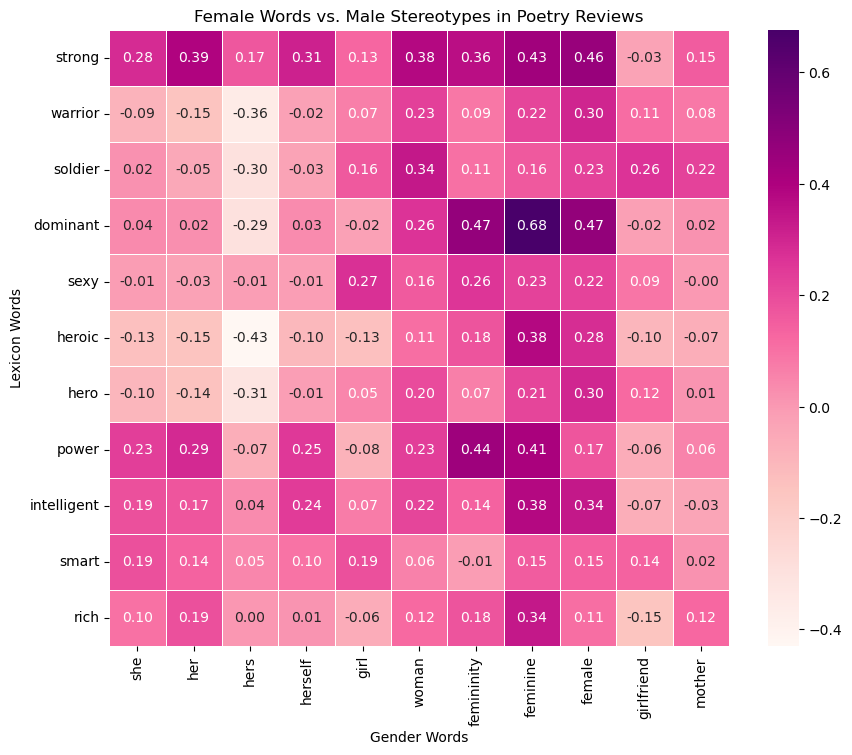

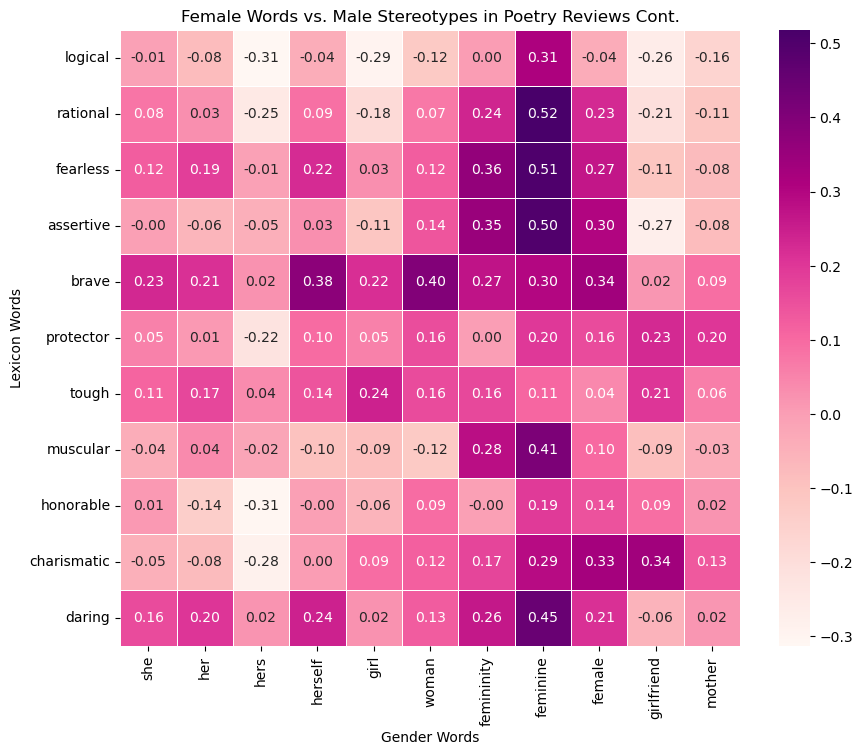

In [11]:
plot_heatmap(female_stereotypes_1, women_words, poetry_model, "Female Stereotype Associations in Poetry Reviews", "RdPu")
plot_heatmap(female_stereotypes_2, women_words, poetry_model, "Female Stereotype Associations Cont. in Poetry Reviews", "RdPu")
plot_heatmap(female_stereotypes_1, men_words, poetry_model, "Male Words vs. Female Stereotypes in Poetry Reviews", "GnBu")
plot_heatmap(female_stereotypes_2, men_words, poetry_model, "Male Words vs. Female Stereotypes in Poetry Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, men_words, poetry_model, "Male Stereotype Associations in Poetry Reviews", "GnBu")
plot_heatmap(male_stereotypes_2, men_words, poetry_model, "Male Stereotype Associations in Poetry Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, women_words, poetry_model, "Female Words vs. Male Stereotypes in Poetry Reviews", "RdPu")
plot_heatmap(male_stereotypes_2, women_words, poetry_model, "Female Words vs. Male Stereotypes in Poetry Reviews Cont.", "RdPu")

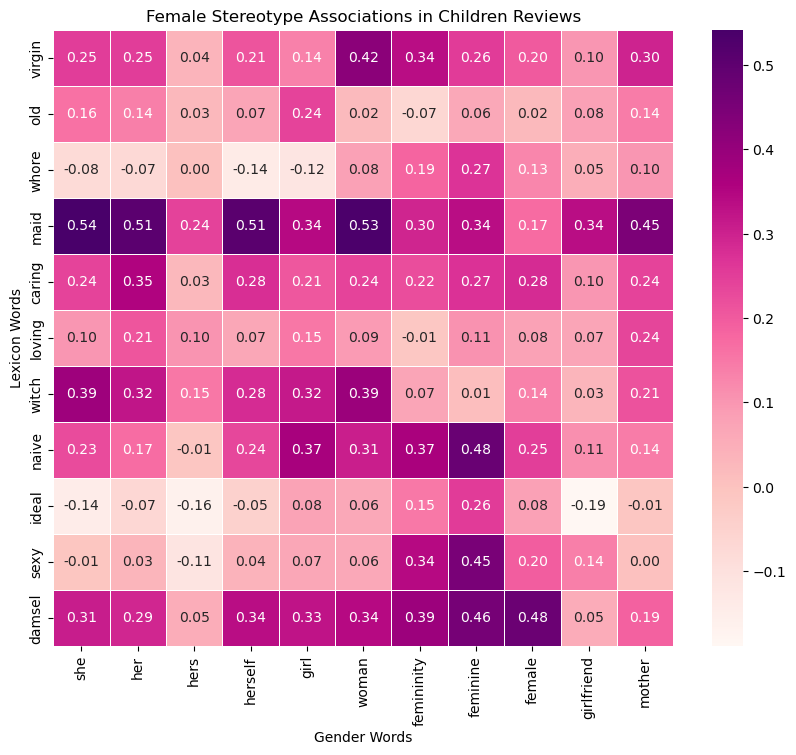

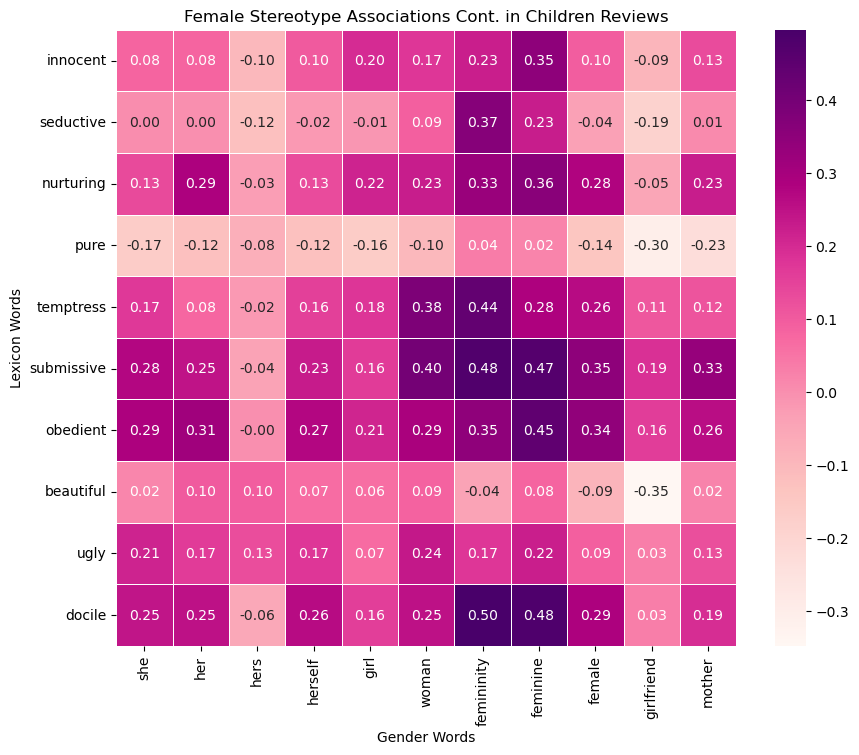

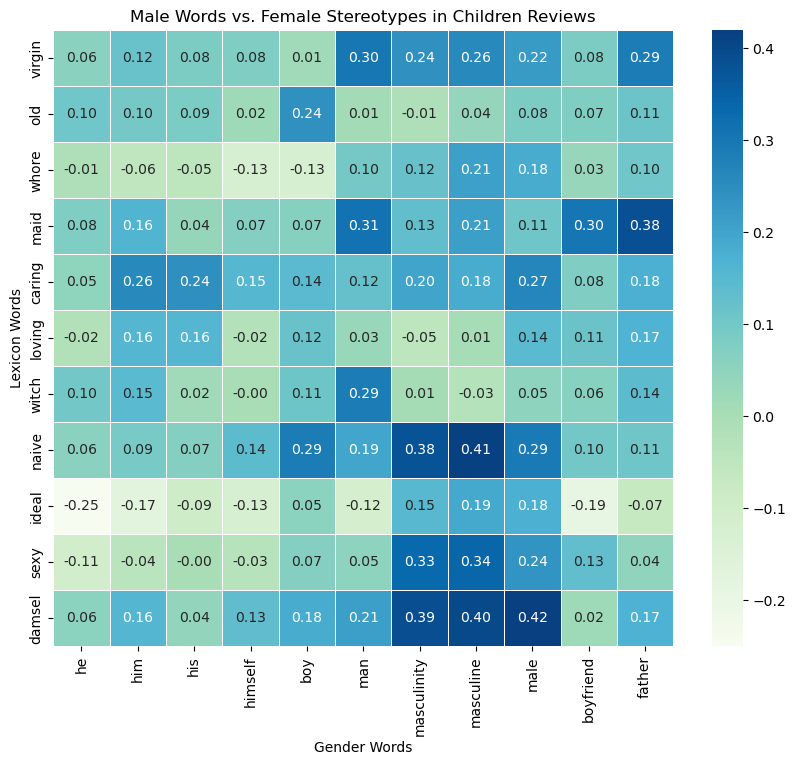

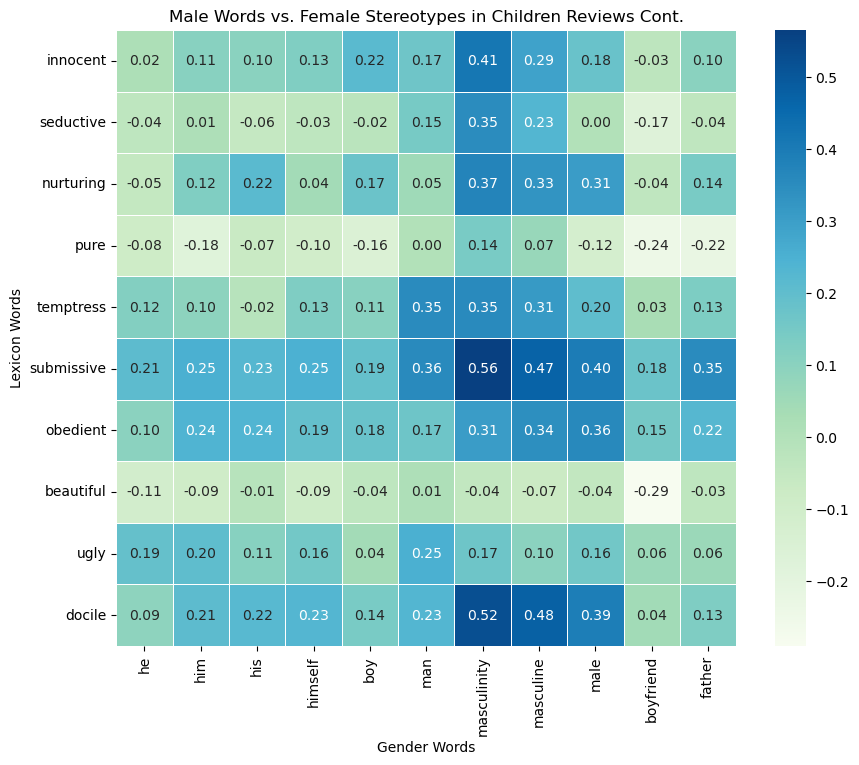

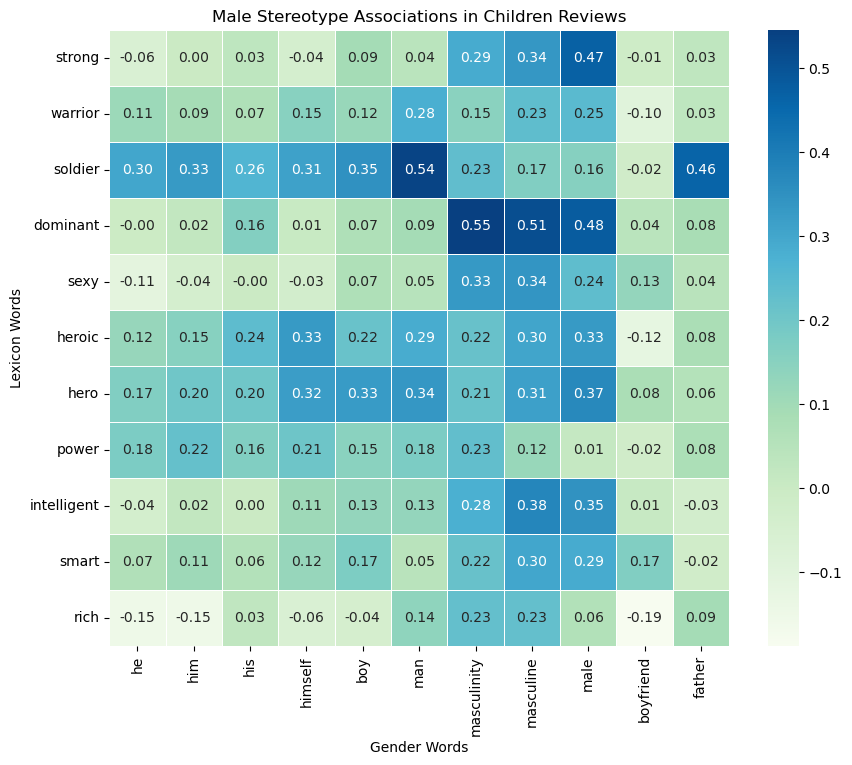

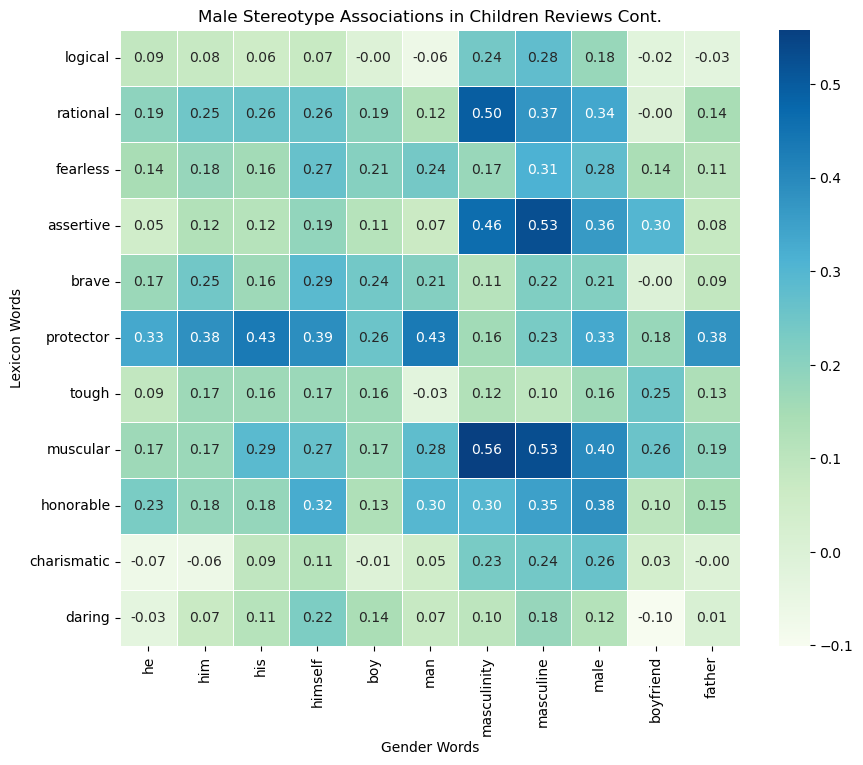

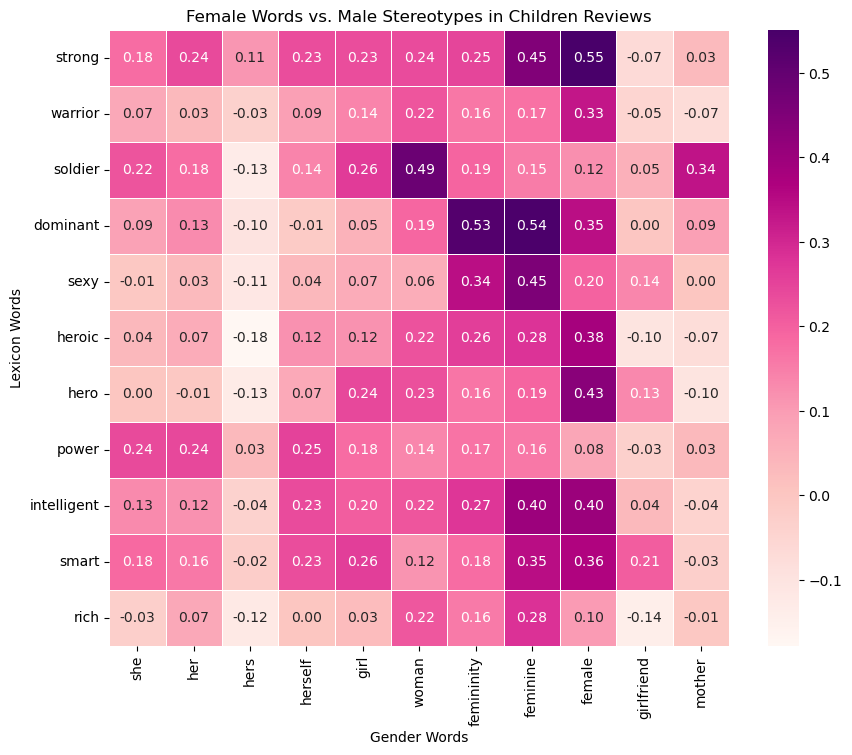

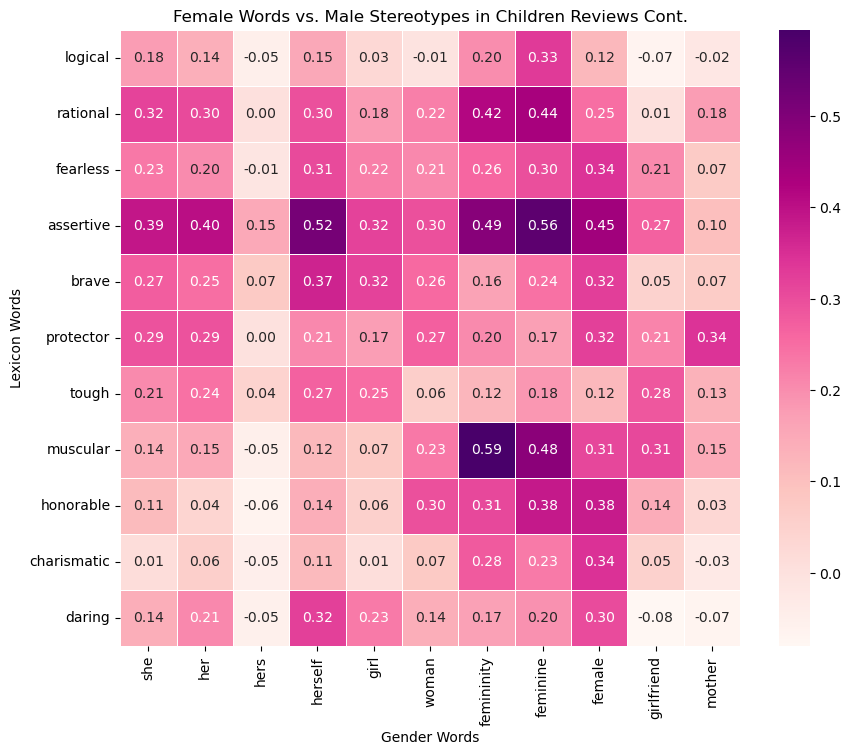

In [12]:
plot_heatmap(female_stereotypes_1, women_words, children_model, "Female Stereotype Associations in Children Reviews", "RdPu")
plot_heatmap(female_stereotypes_2, women_words, children_model, "Female Stereotype Associations Cont. in Children Reviews", "RdPu")
plot_heatmap(female_stereotypes_1, men_words, children_model, "Male Words vs. Female Stereotypes in Children Reviews", "GnBu")
plot_heatmap(female_stereotypes_2, men_words, children_model, "Male Words vs. Female Stereotypes in Children Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, men_words, children_model, "Male Stereotype Associations in Children Reviews", "GnBu")
plot_heatmap(male_stereotypes_2, men_words, children_model, "Male Stereotype Associations in Children Reviews Cont.", "GnBu")
plot_heatmap(male_stereotypes_1, women_words, children_model, "Female Words vs. Male Stereotypes in Children Reviews", "RdPu")
plot_heatmap(male_stereotypes_2, women_words, children_model, "Female Words vs. Male Stereotypes in Children Reviews Cont.", "RdPu")